<a href="https://colab.research.google.com/github/RichardKameri/Machine-learning-2/blob/main/Customer_personality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('/content/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Define the hierarchy for ordinal encoding
education_hierarchy = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}

# Map the hierarchy to the 'Education' column
df['Education_Encoded'] = df['Education'].map(education_hierarchy)


In [5]:
# One-hot encode 'Marital_Status' column
df = pd.get_dummies(df, columns=['Marital_Status'], prefix='Marital',dtype=int)


In [6]:
# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Convert to integer
reference_date = df['Dt_Customer'].min()
df['Dt_Customer_Int'] = (df['Dt_Customer'] - reference_date).dt.days

# Drop the original 'Dt_Customer' column (optional)
df.drop(columns=['Dt_Customer'], inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [8]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Encoded,Marital_Absurd,Marital_Alone,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Marital_YOLO,Dt_Customer_Int
0,5524,1957,Graduation,58138.0,0,0,58,635,88,546,...,3,0,0,0,0,1,0,0,0,36
1,2174,1954,Graduation,46344.0,1,1,38,11,1,6,...,3,0,0,0,0,1,0,0,0,586
2,4141,1965,Graduation,71613.0,0,0,26,426,49,127,...,3,0,0,0,0,0,1,0,0,387
3,6182,1984,Graduation,26646.0,1,0,26,11,4,20,...,3,0,0,0,0,0,1,0,0,560
4,5324,1981,PhD,58293.0,1,0,94,173,43,118,...,5,0,0,0,1,0,0,0,0,538


In [9]:
# scaling
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [11]:
# Select the numerical columns for clustering
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [12]:
# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=1)

In [14]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# ... (Your previous code for data loading and preprocessing) ...

# Select the numerical columns for clustering
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create an imputer to replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your numerical data and transform it
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Apply DBSCAN (now on the imputed data)
dbscan = DBSCAN(eps=2, min_samples=1)
df['Cluster'] = dbscan.fit_predict(df[numerical_cols])

In [15]:
print(df['Cluster'].value_counts())

Cluster
7       215
3        83
16       76
90       47
34       37
       ... 
552       1
551       1
549       1
548       1
1464      1
Name: count, Length: 1465, dtype: int64


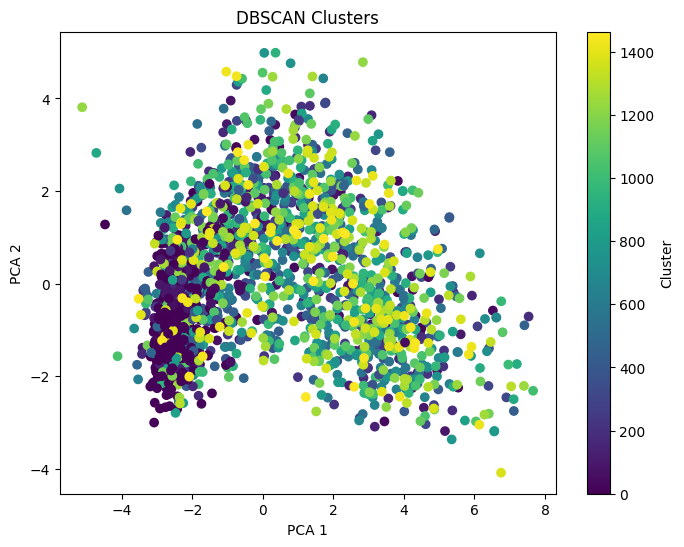

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA

# ... (Your previous code for data loading and preprocessing) ...

# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=1)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[numerical_cols])

# Perform PCA for visualization (add this section)
pca = PCA(n_components=2)  # Initialize PCA with 2 components
df_pca = pca.fit_transform(df[numerical_cols]) # Fit and transform the numerical data

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()